In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import requests
import json

In [ ]:
overpass_url = "https://overpass-api.de/api/interpreter"
name = "City of New York"
query = f"""
[out:json];
area["name"="{name}"]->.nyc;
(
  node(area.nyc);
  way(area.nyc);
  relation(area.nyc);
);
out body;
"""

response = requests.post(overpass_url, data=query)
nyc_data = response.json()

# 保存到文件
with open(f"nyc_osm_data_{name.replace(' ', '_')}.json", "w") as f:
    json.dump(nyc_data, f)

In [ ]:
savePath = rf"E:\MS_ExperimentData\nyc_osm_data_{name.replace(' ', '_')}.pkl"

# 保存为pickle文件
with open(savePath, "wb") as f:
    pickle.dump(nyc_data, f)

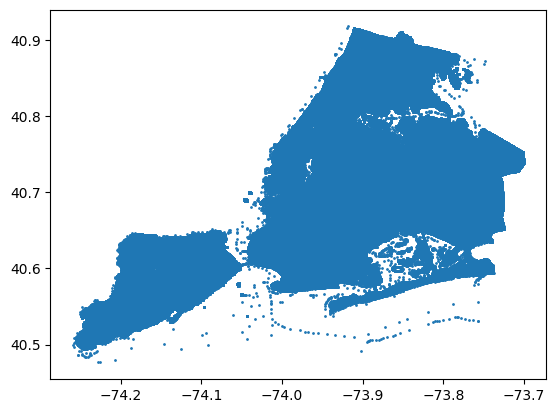

In [ ]:
elements = nyc_data["elements"]
nodes = pd.DataFrame([e for e in elements if e["type"] == "node"])
plt.scatter(nodes["lon"], nodes["lat"], s=1)

In [ ]:
overpass_url = "https://overpass-api.de/api/interpreter"
query = f"""
[out:json];
area["name"="Washington"]->.dc;
(
  node[railway=station][station=subway](area.dc);
  way[railway=station][station=subway](area.dc);
  relation[railway=station][station=subway](area.dc);
);
out center;
"""

response = requests.post(overpass_url, data=query)
nyc_data = response.json()

# 保存到文件
with open(rf"E:\MS_ExperimentData\nyc_osm_data_Washington.json", "w") as f:
    json.dump(nyc_data, f)

In [48]:
overpass_url = "https://overpass-api.de/api/interpreter"
south = 38.791
west = -77.119
north = 38.995
east = -75.909
query = f"""
[out:json];
(
    node[railway=station][station=subway]({south},{west},{north},{east});
    way[railway=station][station=subway]({south},{west},{north},{east});
    relation[railway=station][station=subway]({south},{west},{north},{east});
);
out center;
"""

response = requests.post(overpass_url, data=query)
nyc_data = response.json()

# 保存到文件
# with open(rf"E:\MS_ExperimentData\nyc_osm_data_Washington.json", "w") as f:
#     json.dump(nyc_data, f)

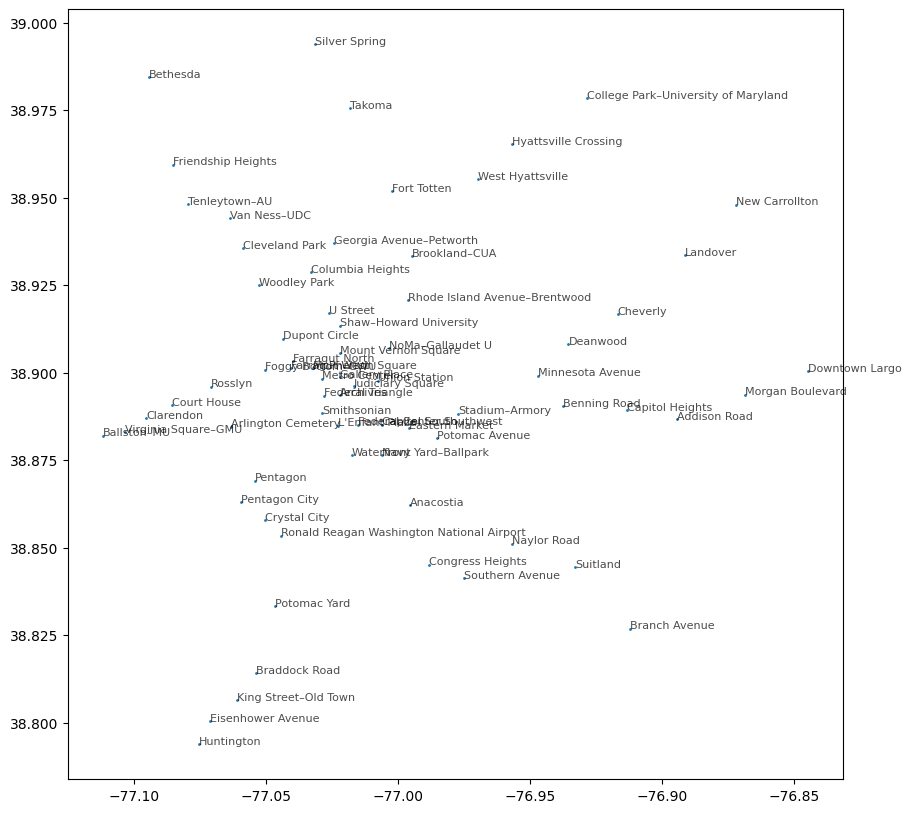

In [49]:
plt.figure(figsize=(10, 10))
elements = nyc_data["elements"]
nodes = pd.DataFrame([e for e in elements if e["type"] == "node"])
nodes["name"] = nodes["tags"].apply(lambda x: x.get("name", ""))
nodes.drop_duplicates("name", inplace=True)
plt.scatter(nodes["lon"], nodes["lat"], s=1)
for i, row in nodes.iterrows():
    plt.annotate(row["name"], (row["lon"], row["lat"]), fontsize=8, alpha=0.7)
# plt.xlim

In [51]:
nodes.to_parquet("Washington_Metrorail.parquet")